In [1]:
# EDA & Classification on Heart Disease dataset (Cleveland)
# This data can be downloaded on http://archive.ics.uci.edu/ml/datasets/heart+disease
# There are total 14 attributes in this data:
# 1. age: age in years
# 2. sex: 1=male, 0=female
# 3. cp: chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
# 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# 5. chol: serum cholestoral in mg/dl
# 6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
# 7. restecg: resting electrocardiographic results (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria )
# 8. thalach: maximum heart rate achieved
# 9. exang: exercise induced angina (1 = yes, 0 = no)
# 10. oldpeak: ST depression induced by exercise relative to rest
# 11. slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
# 12. ca: number of major vessels (0-3) colored by flourosopy
# 13. thal: 3 = normal, 6 = fixed defect, 7 = reversable defect
# 14. target: 1=Yes, 0=No

In [2]:
# This project will follow these four steps:
# 1: Investage and explore the data set. 
# 2: During the exploring step, I will try to find the answer that how the age influence the target? which age has more chance to get
#the heart disease? 
# 3: Analyze relationship between each category variable and target.
# 4: Find a better predicted model (logistic regression, K-Nearest Neighbors, Decision Tree, Random forest, Support vector machine,
#Gaussian Naive bayes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer #imputer missing value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#Upload the original data set
df = pd.read_csv("...../processed.cleveland.csv",header=None,na_values='?')
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Add column names
df.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [7]:
# It is obvious that there exists the missing value in the last row. So we need to handle the missing value before analysing data.

In [8]:
#Check the empty or NAN value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
# There are 4 missing values in the ca, and 2 in the thal. I need to handle them before analysing the data set.

In [10]:
#Check the data set size
df.shape

(303, 14)

In [11]:
#Get the feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [12]:
#Pre-processing data set
#In the last column, replace 1,2,3 as 1
new_last_column=df.T.iloc[-1].replace([1,2,3,4],1)
df['target']=new_last_column

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


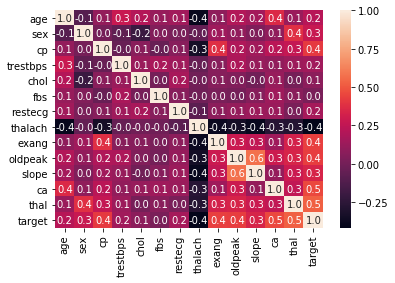

In [15]:
#EDA step
#Check if each variable correlated with the target
sns.heatmap(df.corr(),annot=True,fmt='.1f')

In [16]:
#fbs has no corrlation with target.Oldpeak, thal and ca have the highest corrlation with target.Only thalach has the negative corrlation with target.

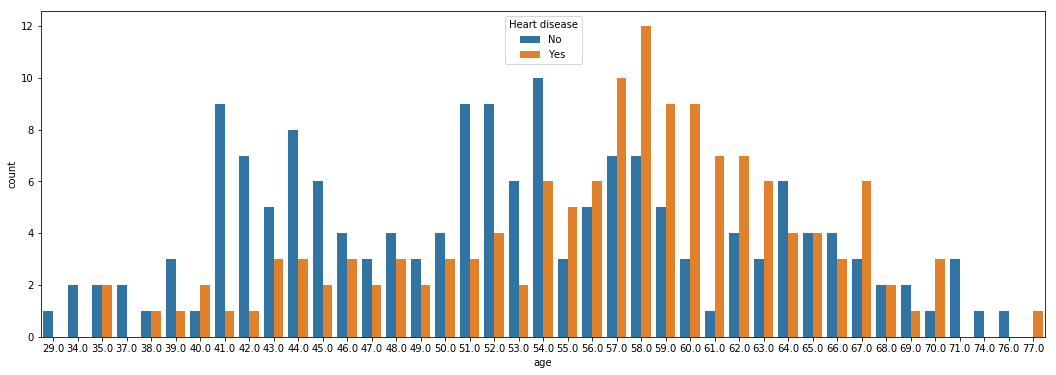

In [17]:
# Answer: how the age influence the target? which age has more chance to get the heart disease? 
plt.figure(figsize=(18,6))
sns.countplot(x='age',data=df,hue='target')
plt.legend(title='Heart disease',labels=['No','Yes'])
plt.show()

In [18]:
# From the plot, we know that people will get more chance to have heart disease when age increased. From the age range of 39 to 54,
#people has less chance to get the heart disease except age 40. However, people will get much more chance to get heart disease from the age 
#range of 55 to 63. At the age of 29,34,37,71,74 and 76, no one get heart disease.

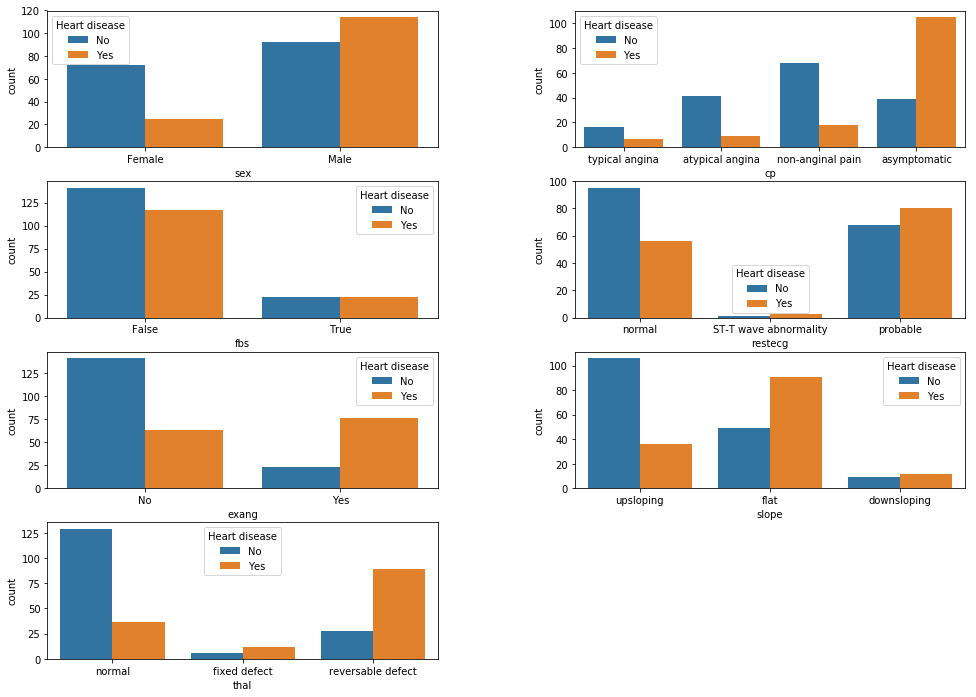

In [19]:
# Analyze relationship between each category variable and target
plt.figure(figsize=(15,10))
# sex vs target
plt.subplot(421)
a=sns.countplot(x='sex',data=df,hue='target')
a.set_xticklabels(('Female','Male'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# cp vs target
plt.subplot(422)
b=sns.countplot(x='cp',data=df,hue='target')
b.set_xticklabels(('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# fbs vs target
plt.subplot(423)
c=sns.countplot(x='fbs',data=df,hue='target')
c.set_xticklabels(('False', 'True'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# restecg vs target
plt.subplot(424)
d=sns.countplot(x='restecg',data=df,hue='target')
d.set_xticklabels(('normal', 'ST-T wave abnormality', 'probable'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# exang vs target
plt.subplot(425)
e=sns.countplot(x='exang',data=df,hue='target')
e.set_xticklabels(('No','Yes'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# slope vs target
plt.subplot(426)
f=sns.countplot(x='slope',data=df,hue='target')
f.set_xticklabels(('upsloping', 'flat', 'downsloping'))
plt.legend(title='Heart disease',labels=['No','Yes'])

# thal vs target
plt.subplot(427)
g=sns.countplot(x='thal',data=df,hue='target')
g.set_xticklabels(('normal', 'fixed defect', 'reversable defect'))
plt.legend(title='Heart disease',labels=['No','Yes'])

plt.subplots_adjust(top=0.92, bottom=0.02, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

In [20]:
# 1: sex: Male has more chance to get the heart disease than female has.
# 2: cp: when the chest pain type showed "asmptomatic", it will have more chance to get the heart disease. But, the other three 
#types are safe.
# 3: fbs: two results look almost no influence on the target. It can be seen on the previous correlation matrix.
# 4: restecg: When restecg showed "normal", less people will get heart disease. However, if restecg showed "probable" or "ST-T 
#wave abnormality", they will be more chance to get heart disease. 
# 5: exang: when exang showed "YES", more chance to get heart disease. Otherwise, the result will be opposite.
# 6: slope: when slope showed "upsloping", less chance to get heart disease. Otherwise, results will be opposite.
# 7: thal: less chance to get heart disease when thal showed "fixed defect".

In [21]:
# Impute the missing values
imp_miss = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
new=imp_miss.fit_transform(df)
new_df=pd.DataFrame(new,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"])
print(new_df.head())
print(new_df.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     1.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  
(303, 14)


In [22]:
# Split the data set, 80% for taining and 20% for testing
trainX, testX, trainLabel, testLabel = train_test_split(new_df.drop(columns=['target']),new_df['target'],test_size = 0.2,
                                                    random_state=42)
print(trainX.shape)
print(testX.shape)
print(trainLabel.shape)
print(testLabel.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [23]:
# Classification
# Logistic regression
lg = LogisticRegression().fit(trainX, trainLabel)
lg_pred=lg.predict(testX)
lg_accuracy=accuracy_score(testLabel,lg_pred)
print(lg_accuracy)

0.9016393442622951


In [24]:
#KNN
KNN_accuracy=[]
for k in range(1,11):
    nbrs = KNeighborsClassifier(n_neighbors=k)
    mdl=nbrs.fit(trainX,trainLabel)
    KNN_pred=mdl.predict(testX)
    KNN_accuracy.append(accuracy_score(testLabel,KNN_pred))
print(max(KNN_accuracy))

0.7213114754098361


In [25]:
# DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(trainX,trainLabel)
DT_pred=DT.predict(testX)
DT_accuracy=accuracy_score(testLabel,DT_pred)
print(DT_accuracy)

0.7540983606557377


In [26]:
#Random Forest
RF=RandomForestClassifier(random_state=42).fit(trainX,trainLabel)
RF_pred=RF.predict(testX)
RF_accuracy=accuracy_score(testLabel,RF_pred)
print(RF_accuracy)

0.8524590163934426


In [27]:
#linear SVM
SVM=svm.SVC(kernel='linear').fit(trainX,trainLabel)
SVM_pred=SVM.predict(testX)
SVM_accuracy=accuracy_score(testLabel,SVM_pred)
print(SVM_accuracy)

0.8852459016393442


In [28]:
# Naive Bayes
NB=GaussianNB().fit(trainX,trainLabel)
NB_pred=NB.predict(testX)
NB_accuracy=accuracy_score(testLabel,NB_pred)
print(NB_accuracy)

0.8360655737704918


In [29]:
# Plot the results
combin_accuracy=[lg_accuracy,max(KNN_accuracy),DT_accuracy,RF_accuracy,SVM_accuracy,NB_accuracy]
print(combin_accuracy)

[0.9016393442622951, 0.7213114754098361, 0.7540983606557377, 0.8524590163934426, 0.8852459016393442, 0.8360655737704918]


Text(0.5,1,'Accuracy')

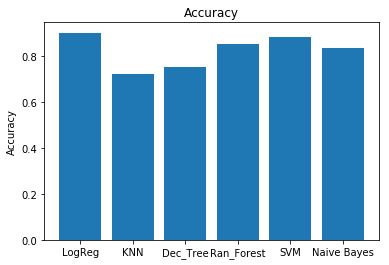

In [30]:
acc_name=('LogReg','KNN','Dec_Tree','Ran_Forest','SVM','Naive Bayes')
y_pos = np.arange(len(acc_name))
plt.bar(y_pos, combin_accuracy)
plt.xticks(y_pos, acc_name)
plt.ylabel('Accuracy')
plt.title('Accuracy')

In [31]:
# Overall, Logistic Regression got the highest accuracy which is 90.16% in these 6 algorithem.